In [52]:
# Import required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [53]:
# Read in data
data = pd.read_csv('/Users/kloeyap/ybell-data-analysis/data/gsheets_clean.csv', delimiter='\t')
data

,Contract Name,Source,Sub Source,Stream Month,Territory,Release Title,Release Artist,ISRC,Track Title,Distribution Channel,Configuration,Units,Net Payable
0,ebb (PLT-SprjsB0s),FUGA,Yandex,October 2022,RU,Bay Area Wave Collection,ebb,US23A1545496,Linda Mar III,Digital,Streaming,2.0,0.001047
1,ebb (PLT-SprjsB0s),FUGA,Yandex,October 2022,RU,Bay Area Wave Collection,ebb,US23A1545351,Kelly's Cove III,Digital,Streaming,3.0,0.001570
2,ebb (PLT-SprjsB0s),FUGA,Yandex,October 2022,RU,Bay Area Wave Collection,ebb,US23A1545495,Linda Mar II,Digital,Streaming,1.0,0.000523
3,ebb (PLT-SprjsB0s),FUGA,Yandex,October 2022,RU,Bay Area Wave Collection,ebb,US23A1545494,Linda Mar I,Digital,Streaming,1.0,0.000523
4,ebb (PLT-SprjsB0s),FUGA,Yandex,October 2022,RU,Bay Area Wave Collection,ebb,US23A1545354,Rockaway Beach III,Digital,Streaming,3.0,0.001570
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186160,KAIYO (PLTM-YI2ybeW4),Apple Music,Apple Music,May 2023,ZA,Palmyra,KAIYO,US23A1560959,Free Diving,Digital,General Stream,3.0,0.004630
186161,KAIYO (PLTM-YI2ybeW4),Apple Music,Apple Music,May 2023,BE,Surf Odyssey,KAIYO,US23A1540826,Whenever at Sea,Digital,General Stream,1.0,0.004451
186162,KAIYO (PLTM-YI2ybeW4),Apple Music,Apple Music,May 2023,LV,Palmyra,KAIYO,US23A1560959,Free Diving,Digital,General Stream,1.0,0.001499
186163,KAIYO (PLTM-YI2ybeW4),Apple Music,Apple Music,May 2023,MG,Changing Tide,KAIYO,US23A1545500,High Tide,Digital,General Stream,2.0,0.001532


In [54]:
data.groupby('Distribution Channel')[['Distribution Channel']].count()

,Distribution Channel
Distribution Channel,
Digital,186156
Licensing,6


In [55]:
sourceinfo = data.groupby('Source')[['Source']].count()
sourceinfo = sourceinfo.rename(columns={'Source': 'Count'})
sourceinfo['proportion'] = sourceinfo['Count'].apply(lambda x : x / sum(sourceinfo['Count']))
sourceinfo.sort_values(by ='proportion', ascending=False)


,Count,proportion
Source,,
Apple Music,164167,0.881836
Spotify,14032,0.075374
FUGA,4923,0.026444
YouTube,1996,0.010722
YouTube Red,775,0.004163
iTunes,162,0.000870
iTunes Match,110,0.000591


As expected, Apple Music leads the way with about 88% of streams coming from the platform, with Spotify following, but with only about 7.5%.

In [56]:
artist_count = data.groupby('Release Artist')[['Release Artist']].count()
artist_count = artist_count.rename(columns = {'Release Artist' : 'count'})
artist_count['proportion'] = artist_count['count'] / sum(artist_count['count'])
artist_count.sort_values(by='proportion', ascending=False)


,count,proportion
Release Artist,,
chamberecho,90498,0.486243
KAIYO,54324,0.291881
Sharks Deli,13873,0.074539
ebb,10738,0.057695
m a e a,5326,0.028616
the spaceheads,4893,0.026290
MAIKU,3694,0.019848
Ric Wavy,2771,0.014888


chamberecho is the most popular artist with 48% of streams coming from them, followed by KAIYO. The two together combine with a total of about 77% of all streams. 

In [57]:
artist_pay = data.groupby('Release Artist')[['Net Payable']].sum().sort_values(by = 'Net Payable', ascending=False)
artist_pay['Most Streamed Source'] = data.groupby('Release Artist')


In [58]:
data.groupby(['Release Artist', 'Source'])[['Source']].count()

Source
Release Artist Source              
KAIYO          Apple Music    51972
               FUGA            1152
               Spotify          944
               YouTube          157
               YouTube Red       68
               iTunes            26
               iTunes Match       5
MAIKU          Apple Music     2379
               FUGA              86
               Spotify          486
               YouTube          521
               YouTube Red      218
               iTunes Match       4
Ric Wavy       Apple Music     1675
               FUGA             125
               Spotify          588
               YouTube          328
               YouTube Red       44
               iTunes             4
               iTunes Match       7
Sharks Deli    Apple Music    10839
               FUGA             444
               Spotify         1970
               YouTube          412
               YouTube Red      116
               iTunes            39
               iTunes Match      53
chamberecho    Apple Music    79331
               FUGA            2093
               Spotify         8289
               YouTube          405
               YouTube Red      272
               iTunes            86
               iTunes Match      22
ebb            Apple Music     9075
               FUGA             717
               Spotify          830
               YouTube           68
               YouTube Red       43
               iTunes Match       5
m a e a        Apple Music     4967
               FUGA              58
               Spotify          289
               YouTube            4
               iTunes Match       8
the spaceheads Apple Music     3881
               FUGA             248
               Spotify          636
               YouTube          101
               YouTube Red       14
               iTunes             7
               iTunes Match       6

In [59]:
data.groupby('Territory')[['Territory']].count()

,Territory
Territory,
AD,3
AE,1795
AF,1
AG,415
AI,167
...,...
YE,6
YT,1
ZA,3203


In [60]:
data.groupby('Stream Month')[['Stream Month']].count()

,Stream Month
Stream Month,
April 2022,9727
April 2023,8747
August 2022,12979
December 2022,8801
February 2022,9098
February 2023,7862
January 2022,6988
January 2023,7759
July 2022,12007


June 2023 seemed to have the most streams. **The plan is to convert this data into datetime, so it can actually be sorted correctly, then plotted into a line plot to analyze the trends with respect to time. **

In [61]:
data['Date'] = pd.to_datetime(data['Stream Month'], format="%B %Y")
data

,Contract Name,Source,Sub Source,Stream Month,Territory,Release Title,Release Artist,ISRC,Track Title,Distribution Channel,Configuration,Units,Net Payable,Date
0,ebb (PLT-SprjsB0s),FUGA,Yandex,October 2022,RU,Bay Area Wave Collection,ebb,US23A1545496,Linda Mar III,Digital,Streaming,2.0,0.001047,2022-10-01
1,ebb (PLT-SprjsB0s),FUGA,Yandex,October 2022,RU,Bay Area Wave Collection,ebb,US23A1545351,Kelly's Cove III,Digital,Streaming,3.0,0.001570,2022-10-01
2,ebb (PLT-SprjsB0s),FUGA,Yandex,October 2022,RU,Bay Area Wave Collection,ebb,US23A1545495,Linda Mar II,Digital,Streaming,1.0,0.000523,2022-10-01
3,ebb (PLT-SprjsB0s),FUGA,Yandex,October 2022,RU,Bay Area Wave Collection,ebb,US23A1545494,Linda Mar I,Digital,Streaming,1.0,0.000523,2022-10-01
4,ebb (PLT-SprjsB0s),FUGA,Yandex,October 2022,RU,Bay Area Wave Collection,ebb,US23A1545354,Rockaway Beach III,Digital,Streaming,3.0,0.001570,2022-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186160,KAIYO (PLTM-YI2ybeW4),Apple Music,Apple Music,May 2023,ZA,Palmyra,KAIYO,US23A1560959,Free Diving,Digital,General Stream,3.0,0.004630,2023-05-01
186161,KAIYO (PLTM-YI2ybeW4),Apple Music,Apple Music,May 2023,BE,Surf Odyssey,KAIYO,US23A1540826,Whenever at Sea,Digital,General Stream,1.0,0.004451,2023-05-01
186162,KAIYO (PLTM-YI2ybeW4),Apple Music,Apple Music,May 2023,LV,Palmyra,KAIYO,US23A1560959,Free Diving,Digital,General Stream,1.0,0.001499,2023-05-01
186163,KAIYO (PLTM-YI2ybeW4),Apple Music,Apple Music,May 2023,MG,Changing Tide,KAIYO,US23A1545500,High Tide,Digital,General Stream,2.0,0.001532,2023-05-01


Text(0.5, 1.0, 'Total Streams per Month')

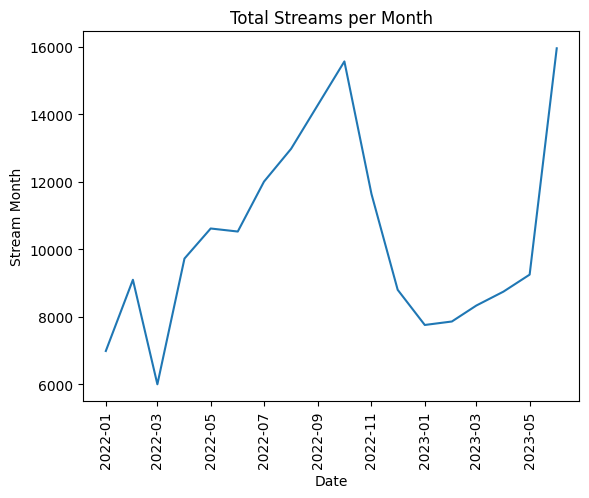

In [62]:
sort_time = data.sort_values(by='Date', ascending=True)
time_tbl = sort_time.groupby('Date')[['Stream Month']].count()
sns.lineplot(data=time_tbl, x='Date', y='Stream Month')
plt.xticks(rotation=90)
plt.title('Total Streams per Month')

In [63]:
s = sort_time.groupby(['Release Artist', 'Date'])[['Date']].count()
s

Date
Release Artist Date            
KAIYO          2022-01-01  2822
               2022-02-01  2522
               2022-03-01  2721
               2022-04-01  2779
               2022-05-01  2766
...                         ...
the spaceheads 2022-07-01   656
               2022-08-01   649
               2022-09-01   670
               2022-10-01   581
               2022-11-01   642

[86 rows x 1 columns]

From this lineplot, I noticed a huge dip in streams from November 2022 to January 2023. What could be the cause of this? And then a sudden rise in May?

In [70]:
stream_counts = data.groupby(['Release Artist', 'Date'])[['Contract Name']].count().unstack(fill_value=0)
stream_counts

Contract Name                                              \
Date              2022-01-01 2022-02-01 2022-03-01 2022-04-01 2022-05-01   
Release Artist                                                             
KAIYO                   2822       2522       2721       2779       2766   
MAIKU                      0          0          0          0          0   
Ric Wavy                  36         25          8         63         53   
Sharks Deli                0       1113        519       1198       1421   
chamberecho             2882       4131       1918       4377       4917   
ebb                        0          0        169        430        669   
m a e a                 1248       1301        397        507        383   
the spaceheads             0          6        269        373        409   

                                                                       \
Date           2022-06-01 2022-07-01 2022-08-01 2022-09-01 2022-10-01   
Release Artist                                                          
KAIYO                2765       2706       2823       2823       2764   
MAIKU                   0          0          0       1674       2020   
Ric Wavy              110        197        587        889        803   
Sharks Deli          1930       1938       1836       1844       2074   
chamberecho          4048       4543       4948       4283       5390   
ebb                   771       1659       1866       1842       1738   
m a e a               266        307        270        269        199   
the spaceheads        638        656        649        670        581   

                                                                       \
Date           2022-11-01 2022-12-01 2023-01-01 2023-02-01 2023-03-01   
Release Artist                                                          
KAIYO                4120       4153       3141       3519       3590   
MAIKU                   0          0          0          0          0   
Ric Wavy                0          0          0          0          0   
Sharks Deli             0          0          0          0          0   
chamberecho          5106       4648       4618       4343       4745   
ebb                  1594          0          0          0          0   
m a e a               179          0          0          0          0   
the spaceheads        642          0          0          0          0   

                                                 
Date           2023-04-01 2023-05-01 2023-06-01  
Release Artist                                   
KAIYO                4056       4254          0  
MAIKU                   0          0          0  
Ric Wavy                0          0          0  
Sharks Deli             0          0          0  
chamberecho          4646       4997      15958  
ebb                     0          0          0  
m a e a                 0          0          0  
the spaceheads          0          0          0

## Looking into chamberecho (most streamed artist)

In [65]:
chamberecho = data[data['Release Artist'] == 'chamberecho']
chamberecho

,Contract Name,Source,Sub Source,Stream Month,Territory,Release Title,Release Artist,ISRC,Track Title,Distribution Channel,Configuration,Units,Net Payable,Date
9144,chamberecho,Spotify,Spotify,January 2022,US,lazy Sunday morning,chamberecho,US23A1542153,lazy Sunday morning,Digital,Streaming,1.0,0.001562,2022-01-01
9145,chamberecho,Spotify,Spotify,January 2022,US,california night,chamberecho,US23A1543075,california night,Digital,Streaming,1.0,0.001015,2022-01-01
9146,chamberecho,Spotify,Spotify,January 2022,AR,monday watch the movie,chamberecho,US23A1541863,monday watch the movie,Digital,Streaming,1.0,0.000523,2022-01-01
9147,chamberecho,Spotify,Spotify,January 2022,GB,monday watch the movie,chamberecho,US23A1541863,monday watch the movie,Digital,Streaming,3.0,0.004611,2022-01-01
9148,chamberecho,Spotify,Spotify,January 2022,US,cuddle in the sheets,chamberecho,US23A1541864,cuddle in the sheets,Digital,Streaming,1.0,0.001550,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163444,chamberecho (PLTM-zqYv2j8i),Apple Music,Apple Music,June 2023,RO,academic ambiance,chamberecho,US23A1562606,exam euphony,Digital,General Stream,135.0,0.292175,2023-06-01
163445,chamberecho (PLTM-zqYv2j8i),Apple Music,Apple Music,June 2023,RO,immersive noise for sleep,chamberecho,US23A1559111,cold brew nation,Digital,General Stream,25.0,0.054106,2023-06-01
163446,chamberecho (PLTM-zqYv2j8i),Apple Music,Apple Music,June 2023,TW,international study,chamberecho,US23A1560085,mon amour,Digital,General Stream,1.0,0.002309,2023-06-01
163447,chamberecho (PLTM-zqYv2j8i),Apple Music,Apple Music,June 2023,TW,dog days,chamberecho,US23A1551451,snooze fest,Digital,General Stream,1.0,0.001442,2023-06-01


In [67]:
chamber_rtcount = chamberecho.groupby('Track Title')[['Track Title']].count().rename(columns = {'Track Title' : 'count'})
chamber_rtcount.sort_values(by='count', ascending=False)


,count
Track Title,
starry night,4526
chill in bed,4309
sleep noise,3591
past my bedtime,3008
stargazing,2899
...,...
textbook tones,8
note take noise,8
brainstorm background,8


The table above gives us interesting findings as we can see that sleep sounds are the most streamed music produced by chamberecho. 

In [15]:
chamber_pay = chamberecho.groupby('Release Title')[['Net Payable']].sum().rename(columns = {'Release Title' : 'count'})
chamber_pay.sort_values(by = 'Net Payable', ascending=False)

,Net Payable
Release Title,
sleep sounds,51803.924521
dream on,10384.305350
bon voyage,9277.132358
what a night,8481.452433
outdoor slumber,8426.669041
...,...
food coma,0.000123
revision rhythms,0.000108
indoor voices,0.000000


#### Defining a function for simplicity

In [36]:
def get_info_from_artists(data, name):
    artist = data[data['Release Artist'] == name]

    most_pop_releases = artist.groupby('Release Title')[['Release Title']].count().rename(columns = {'Release Title' : 'count'})
    most_pop_releases = most_pop_releases.sort_values(by='count', ascending=False)

    artist_pay = artist.groupby('Release Title')[['Net Payable']].sum().rename(columns = {'Release Title' : 'count'})
    artist_pay = artist_pay.sort_values(by = 'Net Payable', ascending=False)

    artist_top_source = artist.groupby('Source')[['Source']].count().rename(columns = {'Source' : 'count'})
    artist_top_source = artist_top_source.sort_values(by='count', ascending=False)
    return artist, most_pop_releases, artist_pay, artist_top_source
    

### Ric Wavy

In [39]:
ricwavy, ricwavy_topreleases, ricwavy_pay, ricwavy_topsources = get_info_from_artists(data, 'Ric Wavy')

In [40]:
ricwavy

,Contract Name,Source,Sub Source,Stream Month,Territory,Release Title,Release Artist,ISRC,Track Title,Distribution Channel,Configuration,Units,Net Payable,Date
95642,Ric Wavy,Spotify,Spotify,January 2022,US,try something,Ric Wavy,US23A1542103,try something,Digital,Streaming,2.0,0.001578,2022-01-01
95643,Ric Wavy,Spotify,Spotify,January 2022,CH,leap into abyss,Ric Wavy,US23A1542211,leap into abyss,Digital,Streaming,1.0,0.000158,2022-01-01
95644,Ric Wavy,Spotify,Spotify,January 2022,US,try something,Ric Wavy,US23A1542103,try something,Digital,Streaming,1.0,0.001562,2022-01-01
95645,Ric Wavy,Spotify,Spotify,January 2022,US,leap into abyss,Ric Wavy,US23A1542211,leap into abyss,Digital,Streaming,1333.0,1.353536,2022-01-01
95646,Ric Wavy,Spotify,Spotify,January 2022,PH,leap into abyss,Ric Wavy,US23A1542211,leap into abyss,Digital,Streaming,1.0,0.000220,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98408,Ric Wavy (PLT-nmbQk4qu),YouTube,YouTube,October 2022,FR,Touch The Sky,Ric Wavy,US23A1550483,Touch The Sky,Digital,Video (Streaming),7.0,0.000000,2022-10-01
98409,Ric Wavy (PLT-nmbQk4qu),YouTube,YouTube,October 2022,KR,Touch The Sky,Ric Wavy,US23A1549959,Crate Break,Digital,Video (Streaming),5.0,0.000000,2022-10-01
98410,Ric Wavy (PLT-nmbQk4qu),YouTube Red,YouTube,October 2022,US,Touch The Sky,Ric Wavy,US23A1550483,Touch The Sky,Digital,Streaming,16.0,0.019931,2022-10-01
98411,Ric Wavy (PLT-nmbQk4qu),YouTube,YouTube,October 2022,GB,Touch The Sky,Ric Wavy,US23A1550483,Touch The Sky,Digital,Video (Streaming),13.0,0.000028,2022-10-01


In [41]:
ricwavy_topreleases

,count
Release Title,
Touch The Sky,2010
leap into abyss,480
try something,213
Crate Break,55
Power To Dilla,13


Unlike chamberecho, it is hard to tell what type of music is the most streamed for Ric Wavy. They only have 5 release titles, so they do not have as many streams.

In [42]:
ricwavy_pay

,Net Payable
Release Title,
Touch The Sky,1008.840667
leap into abyss,7.505748
try something,6.559409
Power To Dilla,0.086175
Crate Break,0.072201


In [43]:
ricwavy_topsources

,count
Source,
Apple Music,1675
Spotify,588
YouTube,328
FUGA,125
YouTube Red,44
iTunes Match,7
iTunes,4
